In [1]:
!pip install import-ipynb

<string>:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  6 of 6 completed


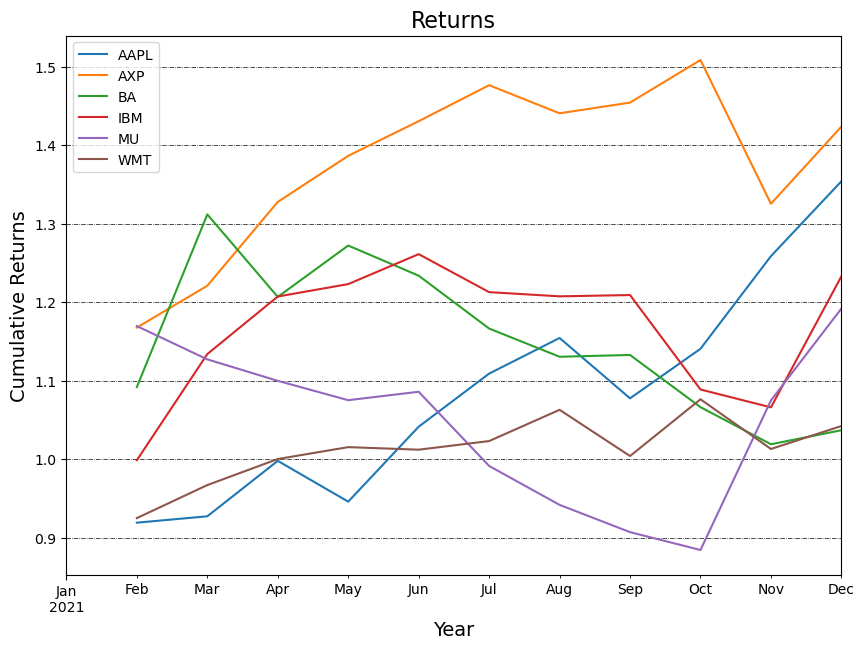

Monthly Return 0.12682503013196977
Quarterly Return 0.1698585600000002


c:\Users\kevin\anaconda3\envs\myenv\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [2]:
import yfinance as yf
import import_ipynb
import multipleStocks

In [3]:
import pandas as pd

tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
import numpy as np
import re

tickers['Founded_clean'] = tickers['Founded'].astype(str).apply(
    lambda x: int(re.search(r'\b(18|19|20)\d{2}\b', x).group()) if re.search(r'\b(18|19|20)\d{2}\b', x) else np.nan
)

tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Founded_clean
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,1902.0
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,1916.0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1888.0
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2013.0
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1989.0
...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011,2011.0
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997,1997.0
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969,1969.0
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,1927.0


Using IQR to detect outliers

In [5]:
Q1 = tickers['Founded_clean'].quantile(0.25)
Q3 = tickers['Founded_clean'].quantile(0.75)
IQR = Q3 - Q1
outliers = tickers[(tickers['Founded_clean'] < Q1 - 1.5 * IQR) |
     (tickers['Founded_clean'] > Q3 + 1.5 * IQR)]

outliers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Founded_clean
114,CL,Colgate-Palmolive,Consumer Staples,Household Products,"New York City, New York",1957-03-04,21665,1806,1806.0
222,HIG,Hartford (The),Financials,Property & Casualty Insurance,"Hartford, Connecticut",1957-03-04,874766,1810,1810.0


In [6]:
import re
tickers.Founded = [re.sub(r"\s*[\(\[].*$", "", x) for x in tickers.Founded]
tickers.Founded = [re.sub(r"/.*", "",x) for x in tickers.Founded]
tickers.Founded

0      1902
1      1916
2      1888
3      2013
4      1989
       ... 
498    2011
499    1997
500    1969
501    1927
502    1952
Name: Founded, Length: 503, dtype: object

In [7]:
tickers['Founded_clean'].dtype

dtype('float64')

Dropping the founded column & replacing it with a numerical version of it

In [8]:
tickers.drop('Founded', axis = 1, inplace = True)
tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded_clean
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902.0
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916.0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888.0
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013.0
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989.0
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011.0
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997.0
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969.0
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927.0


In [9]:
pharma = tickers[tickers['GICS Sub-Industry'] == 'Pharmaceuticals']
pharma = pharma[pharma['Founded_clean'] < 2020]
pharma.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded_clean
69,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989.0
264,JNJ,Johnson & Johnson,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886.0
287,LLY,Lilly (Eli),Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876.0
309,MRK,Merck & Co.,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158,1891.0
368,PFE,Pfizer,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,78003,1849.0


In [10]:
import yfinance as yf

tickers_list = [symbol for symbol in pharma['Symbol'].head().tolist() if symbol != 'BRK.B']
print("Tickers: ", tickers)

#getting for the month of march
data = yf.download(tickers_list, start='2020-03-01', end='2020-03-31', interval = '1wk')['Close']
data

Tickers:      Symbol             Security             GICS Sector  \
0      MMM                   3M             Industrials   
1      AOS          A. O. Smith             Industrials   
2      ABT  Abbott Laboratories             Health Care   
3     ABBV               AbbVie             Health Care   
4      ACN            Accenture  Information Technology   
..     ...                  ...                     ...   
498    XYL           Xylem Inc.             Industrials   
499    YUM          Yum! Brands  Consumer Discretionary   
500   ZBRA   Zebra Technologies  Information Technology   
501    ZBH        Zimmer Biomet             Health Care   
502    ZTS               Zoetis             Health Care   

                                GICS Sub-Industry    Headquarters Location  \
0                        Industrial Conglomerates    Saint Paul, Minnesota   
1                               Building Products     Milwaukee, Wisconsin   
2                           Health Care Equipme

C:\Users\kevin\AppData\Local\Temp\ipykernel_18400\982682433.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2020-03-01', end='2020-03-31', interval = '1wk')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,BMY,JNJ,LLY,MRK,PFE
Date,,,,,
2020-03-02,49.164795,122.385635,132.770950,66.063324,26.156858
2020-03-09,44.827930,115.716156,130.809341,61.683228,24.431498
2020-03-16,39.455750,103.307808,114.881691,57.825130,21.667921
2020-03-23,43.034485,106.125565,125.872383,58.124943,23.079586
2020-03-30,45.439339,112.993217,130.199249,62.346756,24.379213


Visualizing time series for prices of the 5 pharmaceuticals

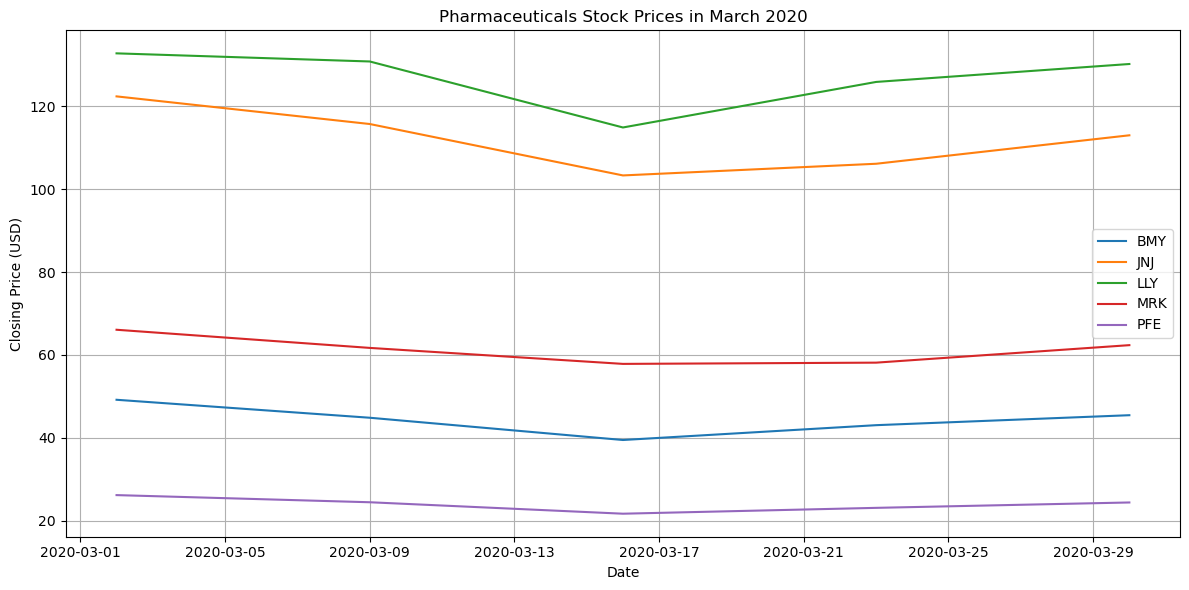

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 6))
for symbol in data.columns:
    plt.plot(data.index, data[symbol], label=symbol)
plt.title('Pharmaceuticals Stock Prices in March 2020')

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')

plt.grid(True) 

plt.legend()
plt.tight_layout()
plt.show()